# Tier 2. Module 2: Numerical Programming in Python

## Topic 10 - EM-algorithm and separation of mixture of Gaussian functions

## Homework

Application of knowledge obtained by studying the model of Gaussian mixtures.

This will help to consolidate the following skills:

* preliminary data preparation for modeling;
* working with data analysis libraries.

### Task

#### 1 - Install and import the necessary libraries. The following packages will need to be installed

In [ ]:
!pip install plotly==5.20.0

In [ ]:
!pip install "jupyterlab>=3" "ipywidgets>=7.6"

#### 2 - Load data from a set [World Happiness Report](https://colab.research.google.com/corgiredirector?site=https%3A%2F%2Fwww.kaggle.com%2Fdatasets%2Funsdsn%2Fworld-happiness) from Kaggle

In [ ]:
!wget -O WorldHappinessReport.zip https://github.com/goitacademy/NUMERICAL-PROGRAMMING-IN-PYTHON/blob/main/WorldHappinessReport.zip?raw=true

#### 3 - Unzip the data

In [ ]:
!unzip WorldHappinessReport.zip

#### 4 - Read data and display general information about statistics and feature types

In [6]:
import pandas as pd

data = pd.read_csv("src/world_happiness_report_2019.csv")

print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB
None
       Overall rank       Score  GDP per capita  Social support  \
count    156.000000  156.000000      156.000000      156.000000   
mean      78.500000    5.407096        0.9051

#### 5 - Construct diagrams of the distribution of numerical signs. Analyze whether or not it conforms to a normal distribution

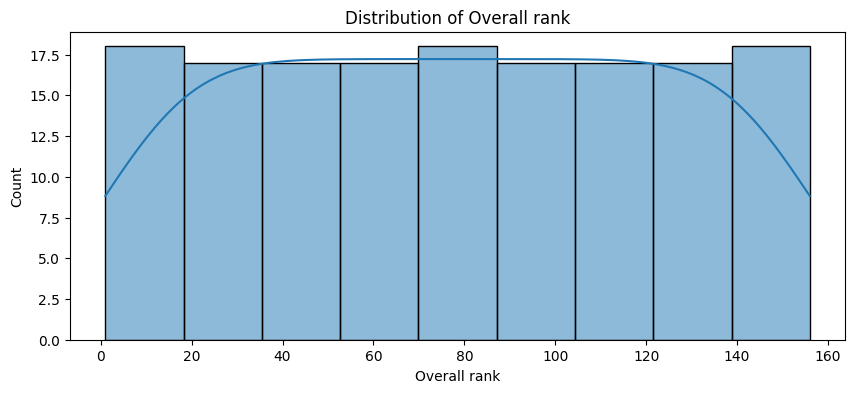

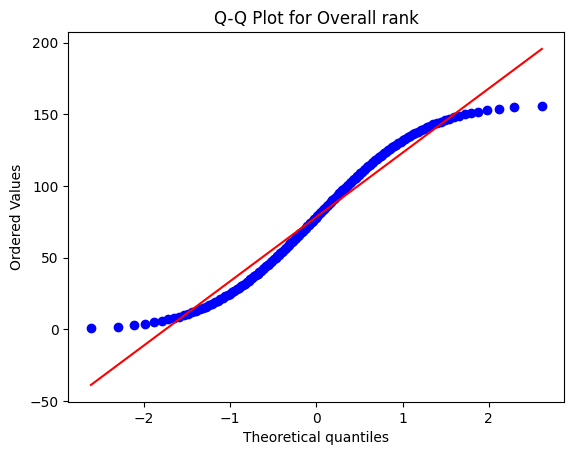

Shapiro-Wilk Test: Statistics = 0.95461286237505, p = 5.7432785513545135e-05
Feature `Overall rank` does not look Gaussian


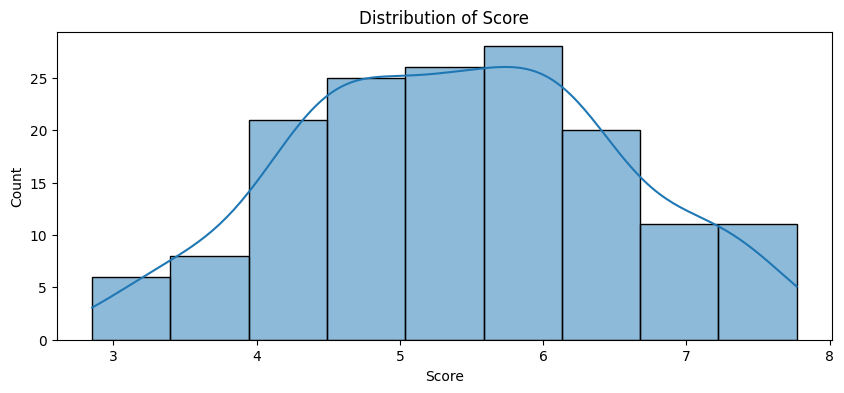

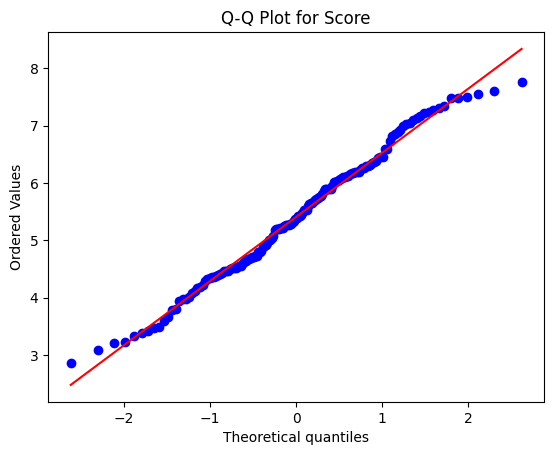

Shapiro-Wilk Test: Statistics = 0.987200932322943, p = 0.16325039557650506
Feature `Score` looks Gaussian


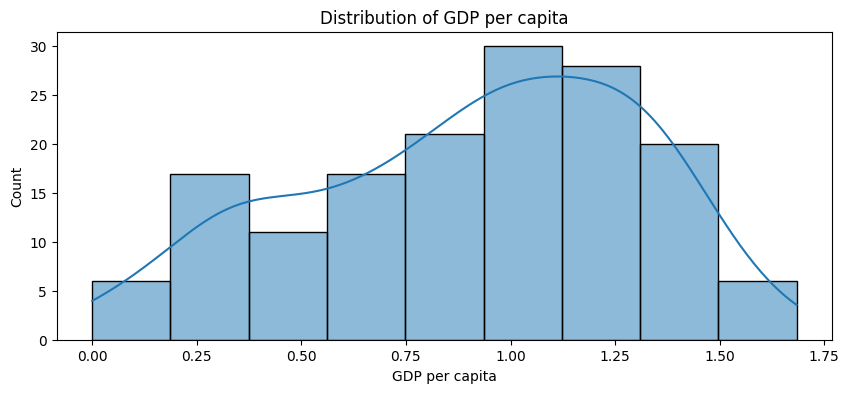

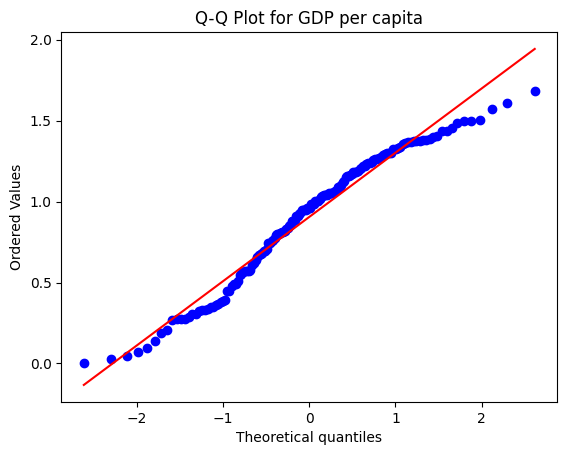

Shapiro-Wilk Test: Statistics = 0.9652908380897589, p = 0.0005821059977069546
Feature `GDP per capita` does not look Gaussian


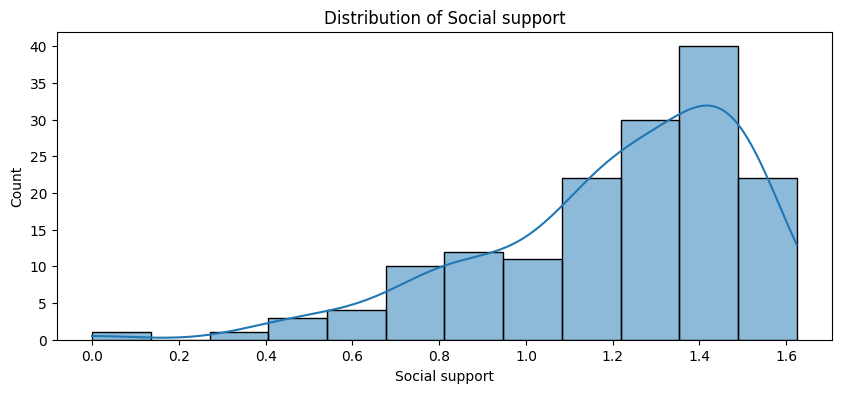

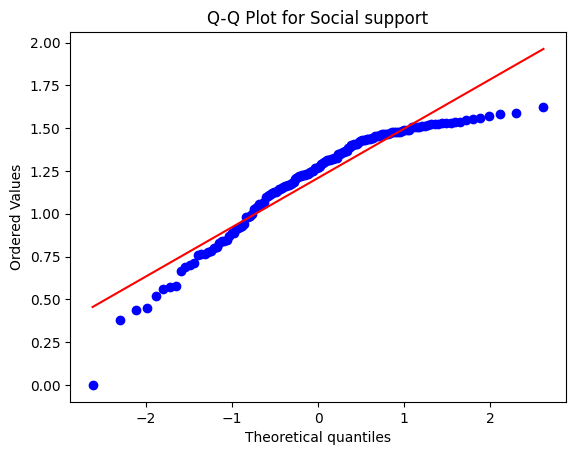

Shapiro-Wilk Test: Statistics = 0.9073697296182384, p = 2.1576763024003166e-08
Feature `Social support` does not look Gaussian


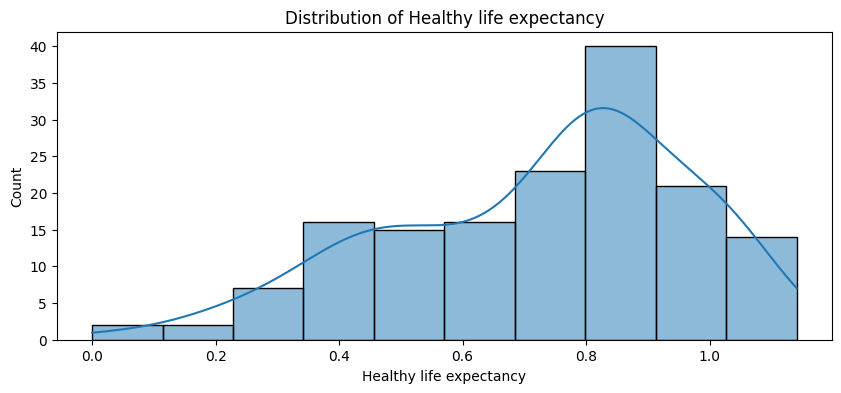

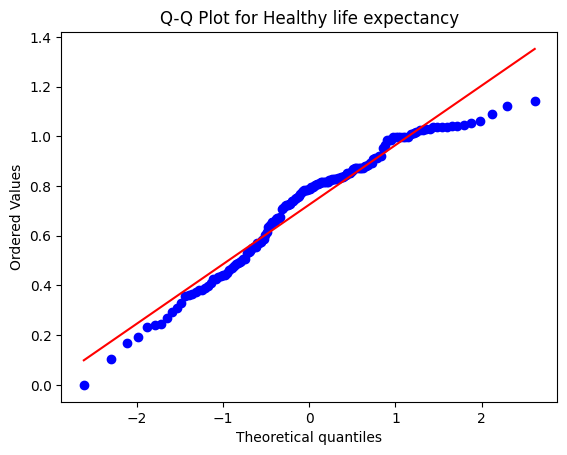

Shapiro-Wilk Test: Statistics = 0.9534112235700445, p = 4.497881880938178e-05
Feature `Healthy life expectancy` does not look Gaussian


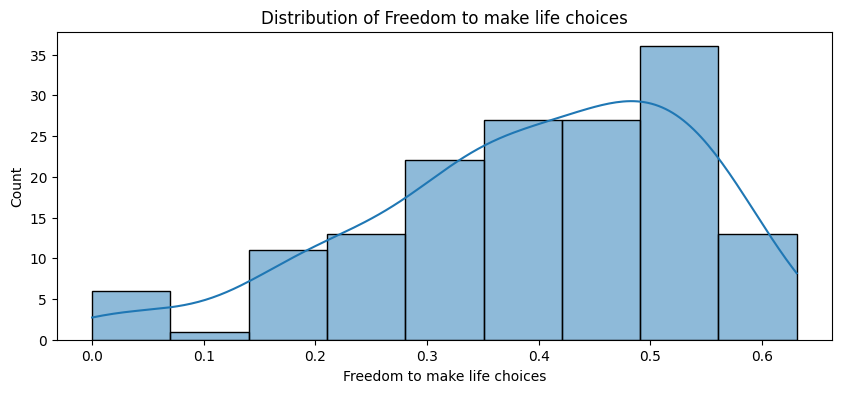

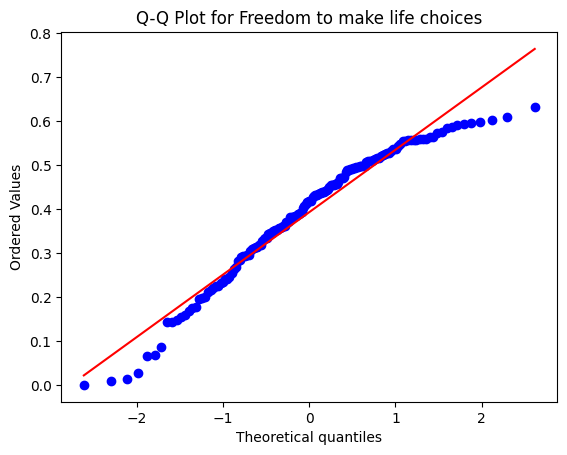

Shapiro-Wilk Test: Statistics = 0.9542985394743325, p = 5.385986901299192e-05
Feature `Freedom to make life choices` does not look Gaussian


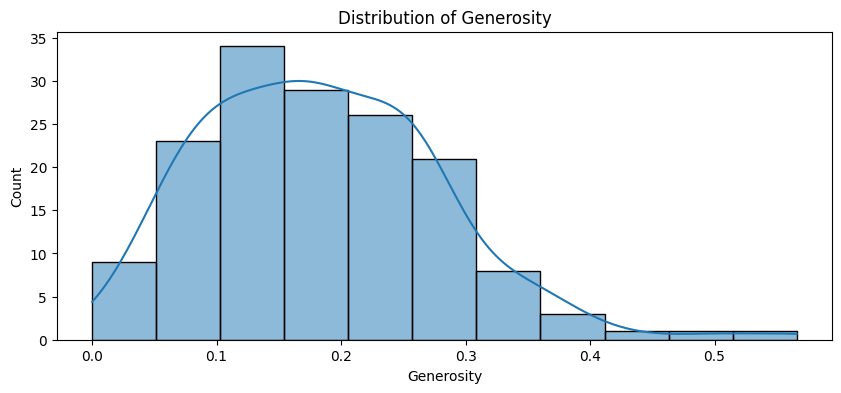

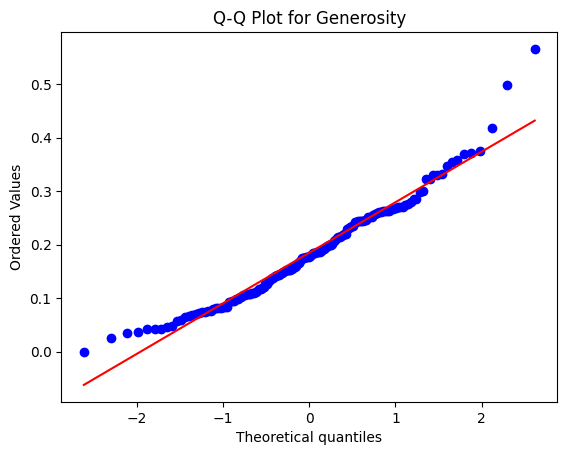

Shapiro-Wilk Test: Statistics = 0.9639373046085179, p = 0.0004274019360009347
Feature `Generosity` does not look Gaussian


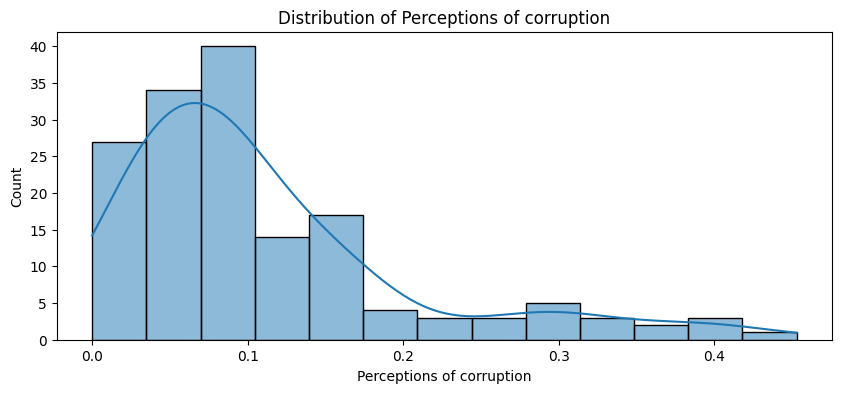

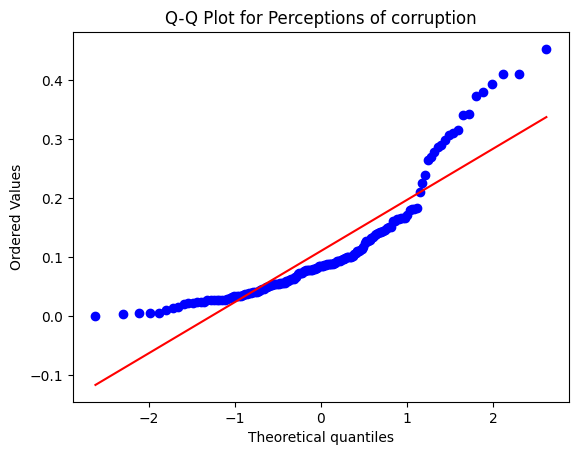

Shapiro-Wilk Test: Statistics = 0.8227983408187733, p = 1.8132147619508553e-12
Feature `Perceptions of corruption` does not look Gaussian


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

numerical_features = data.select_dtypes(include=["float64", "int64"]).columns

for feature in numerical_features:
    plt.figure(figsize=(10, 4))
    sns.histplot(data[feature], kde=True)
    plt.title(f"Distribution of {feature}")
    plt.show()

    # Checking for normality with Q-Q plot
    stats.probplot(data[feature], dist="norm", plot=plt)
    plt.title(f"Q-Q Plot for {feature}")
    plt.show()

    # Checking for normality with Shapiro-Wilk test
    stat, p = stats.shapiro(data[feature])
    print(f"Shapiro-Wilk Test: Statistics = {stat}, p = {p}")
    alpha = 0.05
    if p > alpha:
        print(f"Feature `{feature}` looks Gaussian")
    else:
        print(f"Feature `{feature}` does not look Gaussian")

#### 6 - Based on the understanding of the domain and the data, select a certain number of numerical features and display the correlation matrix

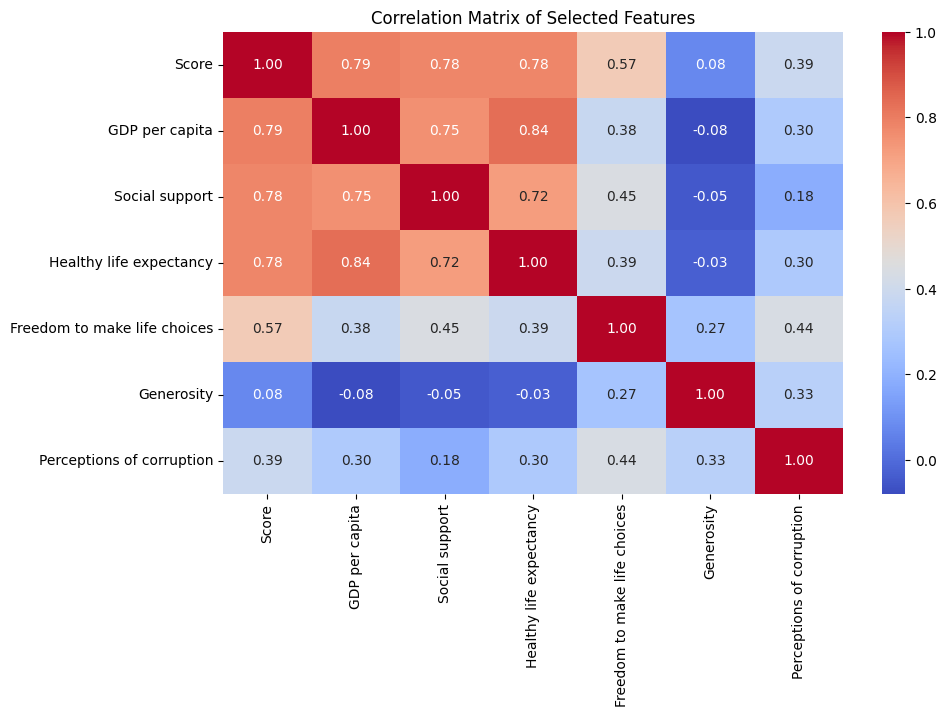

In [12]:
selected_features = [
    "Score",
    "GDP per capita",
    "Social support",
    "Healthy life expectancy",
    "Freedom to make life choices",
    "Generosity",
    "Perceptions of corruption",
]

correlation_matrix = data[selected_features].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Selected Features")
plt.show()

#### 7 - To draw a conclusion about the presence and strength of a linear relationship between features

"GDP per capita", "Social support" and "Healthy life expectancy" are highly correlated with each other and have a strong positive linear relationship (0.78-0.79) with "Happiness Score".

#### 8 - Display the distribution of the target characteristic (Happiness.Score or Happiness.Rank) by country

In [15]:
import plotly.express as px

fig = px.choropleth(
    data, locations="Country or region", color="Score", locationmode="country names"
)
fig.update_layout(title="Happiness Index")
fig.show()

#### 9 - Apply data standardization to bring all values ​​to the same range of statistics

In [16]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer


def data_scale(data, scaler_type="minmax"):
    if scaler_type == "minmax":
        scaler = MinMaxScaler()
    elif scaler_type == "std":
        scaler = StandardScaler()
    elif scaler_type == "norm":
        scaler = Normalizer()

    scaler.fit(data)
    res = scaler.transform(data)
    return res


data_scaled = data_scale(data[selected_features], scaler_type="std")
df_scaled = pd.DataFrame(data_scaled, columns=selected_features)
print(df_scaled.head())

      Score  GDP per capita  Social support  Healthy life expectancy  \
0  2.128711        1.095042        1.268098                 1.080422   
1  1.976397        1.203324        1.221154                 1.121857   
2  1.934938        1.467734        1.251332                 1.254446   
3  1.880862        1.195769        1.392163                 1.246159   
4  1.875454        1.236060        1.050146                 1.134287   

   Freedom to make life choices  Generosity  Perceptions of corruption  
0                      1.424282   -0.335404                   2.996757  
1                      1.396277    0.707265                   3.177158  
2                      1.473292    0.907373                   2.444941  
3                      1.389276    1.781530                   0.078500  
4                      1.151229    1.444506                   1.988632  


#### 10 - Display the statistics of the obtained standardized data set and compare with the statistics of the original data set. Draw conclusions

In [19]:
print("Original data")
print(data[selected_features].describe())

print("Scaled data")
print(df_scaled.describe())

Original data
            Score  GDP per capita  Social support  Healthy life expectancy  \
count  156.000000      156.000000      156.000000               156.000000   
mean     5.407096        0.905147        1.208814                 0.725244   
std      1.113120        0.398389        0.299191                 0.242124   
min      2.853000        0.000000        0.000000                 0.000000   
25%      4.544500        0.602750        1.055750                 0.547750   
50%      5.379500        0.960000        1.271500                 0.789000   
75%      6.184500        1.232500        1.452500                 0.881750   
max      7.769000        1.684000        1.624000                 1.141000   

       Freedom to make life choices  Generosity  Perceptions of corruption  
count                    156.000000  156.000000                 156.000000  
mean                       0.392571    0.184846                   0.110603  
std                        0.143289    0.095254     

All features have been scaled to the same size using `MinMaxScaler`, now the mean is zero and the standard deviation is 1. This pre-processing of the data will make the model easier to train.

#### 11 - Build a clustering model using the `GaussianMixture()` function of the sklearn library

In [31]:
from sklearn.mixture import GaussianMixture

model = GaussianMixture(n_components=3, random_state=42)  # 3 clusters
model.fit(df_scaled)

data["Cluster"] = model.predict(df_scaled)  # cluster label

#### 12 - Build a heat map to display the distribution of countries by clusters

In [33]:
cluster_labels = {2: "happy", 0: "neutral", 1: "unhappy"}
data["Cluster_Label"] = data["Cluster"].map(cluster_labels)

# Display the heat map using the descriptive labels
fig = px.choropleth(
    data,
    locations="Country or region",
    color="Cluster_Label",
    locationmode="country names",
    color_discrete_map={"happy": "green", "neutral": "yellow", "unhappy": "red"},
)
fig.update_layout(title="Country Clusters based on Happiness Factors")
fig.show()

#### 13 - Investigate the impact of a different set of features on the clustering result

In [34]:
alternative_features = ["Score", "Generosity", "Freedom to make life choices"]

alt_data_scaled = data_scale(data[alternative_features], scaler_type="std")

model_alt = GaussianMixture(n_components=3, random_state=42)
model_alt.fit(alt_data_scaled)

data["Alt_Cluster"] = model_alt.predict(alt_data_scaled)

In [36]:
cluster_labels_alt = {2: "happy", 0: "neutral", 1: "unhappy"}
data["Alt_Cluster_Label"] = data["Alt_Cluster"].map(cluster_labels)

# Display the heat map using the descriptive labels
fig = px.choropleth(
    data,
    locations="Country or region",
    color="Alt_Cluster_Label",
    locationmode="country names",
    color_discrete_map={"happy": "green", "neutral": "yellow", "unhappy": "red"},
)
fig.update_layout(
    title="Alternative Country Clusters based on Happiness Factors with low correlation"
)
fig.show()

#### 14 - Draw a general conclusion about the correspondence of the clustering results to the original distribution of countries by feature

During the execution of the task, two clustering models were built, one of which accepted features with a high correlation with the general happiness index as input parameters, the other accepted parameters with a low correlation as input. The second model coped much worse with the task of clustering (many "neutral" countries were among "happy" or "unhappy") due to the fact that it relied on less significant characteristics for the general perception of happiness.